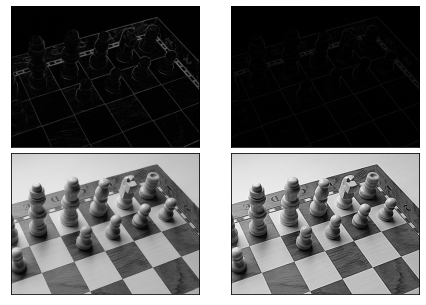

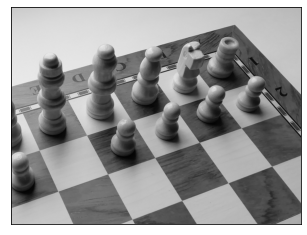

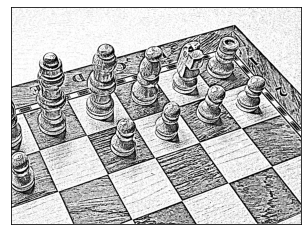

In [2]:
import facets_improc as ip
import numpy as np
import matplotlib.pyplot as plt
img=ip.imread("chess_1024x768_gs.png")

def laplacian_edge_sharpening(img):
    """use laplacian operator to find and enhance the edges"""
    global img_enhanced1
    global img_edge1
    #set M2 as laplacian kernel using below
    M2=np.array([[1,1,1],[1,-8,1],[1,1,1]])
    height,width=img.shape
    ans=np.zeros((height-1,width-1))
    #apply the filter on every pixel
    for i in range(1,height-1):
        for j in range(1,width-1):
            ans[i,j]=np.sum(M2*img[i-1:i+2,j-1:j+2])
    #ans contains the required edges
    img_edge1=ans
    #compute the edge enhancement 
    h,w=img.shape
    img_enhanced1=img[:h-1,:w-1]-img_edge1
laplacian_edge_sharpening(img)

def unsharp_mask_filter(img,k):
    global img_edge2
    global img_enhanced2
    #apply a guassion filter with stnadard div=2
    smooth_img= ip.gaussian_filter(img, sigma=2.0, truncate=4.0, mode="reflect")
    #edge detection process
    img_edge2=img-smooth_img
    #edge enhancement process
    img_enhanced2=img+img_edge2*k
unsharp_mask_filter(img,4)  

#comparing results in a 2*2 block
fig, ax = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.04, wspace=0.04, top=1, bottom=0, left=0, right=1)
plt.sca(ax[0, 0])
ip.imshow(img_edge1, new_figure=False)
plt.sca(ax[0, 1])
ip.imshow(img_edge2, new_figure=False)
plt.sca(ax[1, 0])
ip.imshow(img_enhanced1, new_figure=False)
plt.sca(ax[1, 1])
ip.imshow(img_enhanced2, new_figure=False)

ip.imshow(img)
unsharp_mask_filter(img,80)
ip.imshow(img_enhanced2)